In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.style as style
style.use('seaborn-poster')
%matplotlib notebook

In [3]:
DEATH_BY_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
CASES_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [4]:
def data_preparation(url):
    """
    Function to prepare the data to be analyzed.

    Args:
        url ([string]): url address where values are stored

    Returns:
        [Pandas DataFrame]: Table with sort values. The indexes of the rows are
        the countries, and the columns are the dates.
    """

    data_df = pd.read_csv(url)
    colums_exclud = data_df.columns[[0, 2, 3]]
    data_df.drop(colums_exclud,
                 axis=1,
                 inplace=True)
    data_df = data_df.set_index("Country/Region")
    data_df = data_df.groupby(level=0).sum()
    return data_df

In [5]:
CASES_DF = data_preparation(url=CASES_COV)
DEATH_DF = data_preparation(url=DEATH_BY_COV)

In [6]:
CASES_DF

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  7/18/20  7/19/20  \
Country/Region                                          ...                     
Afghanistan               0        0        0        0  ...    35301    35475   
Albania                   0        0        0        0  ...     4008     4090   
Algeria                   0        0        0        0  ...    22549    23084   
Andorra                   0        0        0        0  ...      880      880   
Angola                    0        0        0        0  ...      687      705   
...                     ...      ...      ...      ...  ...      ...      ...   
West Bank and Gaza        0        0        0        0  ...     8204     8549   
Western Sahara            0        0        0        0  ...       10       10   
Yemen                     0        0        0        0  ...     1581     1606   
Zambia                    0        0        0        0  ...     2980     2980   
Zimbabwe                  0        0        0        0  ...     1478     1611   

                    7/20/20  7/21/20  7/22/20  7/23/20  7/24/20  7/25/20  \
Country/Region                                                             
Afghanistan           35526    35615    35727    35928    35981    36036   
Albania                4171     4290     4358     4466     4570     4637   
Algeria               23691    24278    24872    25484    26159    26764   
Andorra                 884      884      889      889      897      897   
Angola                  749      779      812      851      880      916   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza     8916     9228     9398     9744    10093    10306   
Western Sahara           10       10       10       10       10       10   
Yemen                  1619     1629     1640     1654     1674     1674   
Zambia                 3326     3386     3583     3789     3856     4328   
Zimbabwe               1713     1820     2034     2124     2296     2434   

                    7/26/20  7/27/20  
Country/Region                        
Afghanistan           36157    36263  
Albania                4763     4880  
Algeria               27357    27973  
Andorra                 897      907  
Angola                  932      950  
...                     ...      ...  
West Bank and Gaza    10469    10621  
Western Sahara           10       10  
Yemen                  1681     1691  
Zambia                 4481     4552  
Zimbabwe               2512     2704  

[188 rows x 188 columns]

In [7]:
DEATH_DF

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  7/18/20  7/19/20  \
Country/Region                                          ...                     
Afghanistan               0        0        0        0  ...     1164     1181   
Albania                   0        0        0        0  ...      111      112   
Algeria                   0        0        0        0  ...     1068     1078   
Andorra                   0        0        0        0  ...       52       52   
Angola                    0        0        0        0  ...       29       29   
...                     ...      ...      ...      ...  ...      ...      ...   
West Bank and Gaza        0        0        0        0  ...       59       62   
Western Sahara            0        0        0        0  ...        1        1   
Yemen                     0        0        0        0  ...      443      445   
Zambia                    0        0        0        0  ...      120      120   
Zimbabwe                  0        0        0        0  ...       25       25   

                    7/20/20  7/21/20  7/22/20  7/23/20  7/24/20  7/25/20  \
Country/Region                                                             
Afghanistan            1185     1186     1190     1211     1225     1248   
Albania                 113      117      120      123      128      134   
Algeria                1087     1100     1111     1124     1136     1146   
Andorra                  52       52       52       52       52       52   
Angola                   29       30       33       33       35       39   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza       63       64       66       67       70       75   
Western Sahara            1        1        1        1        1        1   
Yemen                   447      456      458      461      469      474   
Zambia                  128      128      128      134      136      139   
Zimbabwe                 26       26       26       28       32       34   

                    7/26/20  7/27/20  
Country/Region                        
Afghanistan            1259     1269  
Albania                 138      144  
Algeria                1155     1163  
Andorra                  52       52  
Angola                   40       41  
...                     ...      ...  
West Bank and Gaza       76       78  
Western Sahara            1        1  
Yemen                   479      483  
Zambia                  139      140  
Zimbabwe                 34       36  

[188 rows x 188 columns]

In [8]:
def data_country(cases_table, death_table, country):
    """
    Function to create a matrix with data of confirmed cases of COVID-19 and
    death by COVID-19. The first column is data-times, the second column is
    confirmed cases of COVID-19, and the third column is deaths by COVID-19.

    Args:
        cases_table ([Pandas DataFrame]): DataFrame with cases
        death_table ([Pandas DataFrame]): DataFrame with deaths
        country ([string]): Country to analize

    Returns:
        [Numpy Array]: Array with the recorded values of confirmed cases and
        confirmed deaths for each date. The first column is the dates, the
        second the confirmed cases and the third the confirmed deaths.
    """

    data_cases = cases_table.loc[country]
    data_death = death_table.loc[country]
    data_array = np.c_[data_cases.index,
                       data_cases.values,
                       data_death.values]
    return data_array

In [9]:
def data_per_day(data_cases, data_death, country):
    """
    Function to calculate the new registered cases of the COVID-19 virus and
    the new registered deaths. Values that are not suitable are removed from
    the table.

    Args:
        data_cases ([Pandas DataFrame]): DataFrame with cases
        data_death ([Pandas DataFrame]): DataFrame with deaths
        country ([string]): Country to analize

    Returns:
        [tuple]: The return is a tuple with two numpy arrays. The first array
        is the data of the new cases registered for each time, and the second
        is the new deaths registered for each time.
    """
    data_df = data_country(cases_table=data_cases,
                           death_table=data_death,
                           country=country)
    cases = data_df[:, 1]
    death = data_df[:, 2]

    cases = np.array(list(map(lambda i: cases[i] - cases[i-1],
                              range(1, len(cases)))))
    cases = np.c_[data_df[1:, 0], cases]
    cases = np.array(list(filter(lambda x: x[-1] >= 0, cases)))

    death = np.array(list(map(lambda i: death[i] - death[i-1],
                              range(1, len(death)))))
    death = np.c_[data_df[1:, 0], death]
    death = np.array(list(filter(lambda x: x[-1] >= 0, death)))

    return cases, death

In [11]:
def country_plot(data_cases, data_death, country, subplot=True, save=True):
    """
    Function to plot the data of COVID-19 confirmed cases and deaths by
    COVID-19 in the same plot.
    Args:
        data_cases ([Pandas DataFrame]): DataFrame with cases.
        data_death ([Pandas DataFrame]): DataFrame with deaths.
        country ([string]): Country to analize.
        subplot (bool, optional): Subplot with last seven days. Defaults to
        True.
        save (bool, optional): Flag to save the plot. Defaults to True.
    """

    labels = "COVID-19 cases,COVID-19 deaths".split(",")
    colors = "tab:blue tab:red".split(" ")
    linestyle = "-. --".split(" ")
    linewidth = 0.9
    width = 0.30
    step_x = 20
    step_y = 15
    size = 12
    labely = "Confirmed COVID-19 cases"
    labely2 = "Deaths reported by COVID-19"

    data_df = data_country(cases_table=data_cases,
                           death_table=data_death,
                           country=country)
    date_time = np.array(list(map(lambda x: datetime.strptime(x, "%m/%d/%y"),
                                  data_df[:, 0])))
    cases = data_df[:, 1]
    deaths = data_df[:, 2]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Virus behavior in {country}", size=size + 5)
    ax_death = ax.twinx()

    ax.plot(date_time,
            cases,
            label=labels[0],
            ls=linestyle[0],
            linewidth=linewidth,
            color=colors[0])
    ax.plot(np.nan,
            label=labels[1],
            linewidth=linewidth,
            ls=linestyle[1],
            color=colors[1])

    ax_death.plot(date_time,
                  deaths,
                  label=labels[1],
                  linewidth=linewidth,
                  ls=linestyle[1],
                  color=colors[1])

    data_ticks = date_time[np.arange(0, len(date_time), step_x)]
    ax.set_xticks(data_ticks)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))
    ax.xaxis.set_tick_params(rotation=0, labelsize=size-3)

    cases_tick = np.linspace(0, cases[-1], step_y, dtype=int)
    ax.set_yticks(cases_tick)
    ax.yaxis.set_tick_params(labelsize=size-3)
    ax.set_ylabel(labely, size=size)

    death_tick = np.linspace(0, deaths[-1], step_y, dtype=int)
    ax_death.set_yticks(death_tick)
    ax_death.yaxis.set_tick_params(labelsize=size-3)
    ax_death.set_ylabel(labely2, size=size)
    ax.grid(True,
            ls=":",
            lw=0.5,
            alpha=0.5,
            color="black")
    ax.legend(loc=4,
              fontsize=size-4,
              frameon=False)

    if subplot:
        last_week_values = (cases[-7:], deaths[-7:])
        ax_cases = inset_axes(ax,
                              width="100%",
                              height="100%",
                              bbox_to_anchor=(0.125, 0.75, 0.10, .20),
                              bbox_transform=ax.transAxes)
        ax_death = inset_axes(ax,
                              width="100%",
                              height="100%",
                              bbox_to_anchor=(0.125, 0.48, 0.10, .20),
                              bbox_transform=ax.transAxes)
        for i, axis in enumerate((ax_cases, ax_death)):
            axis.barh(date_time[-7:],
                      last_week_values[i],
                      width,
                      label=f"{labels[i]} last seven days",
                      color=colors[i])
            axis.set_xticks([])
            axis.yaxis_date()
            axis.yaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
            axis.spines['top'].set_visible(False)
            axis.spines['bottom'].set_visible(False)
            axis.spines['right'].set_visible(False)
            axis.yaxis.set_tick_params(labelsize=size-5)
            axis.legend(loc=(-0.5, 1),
                        fontsize=size-5,
                        frameon=False)
            for k, v in enumerate(last_week_values[i]):
                axis.text(v/last_week_values[i].max(),
                          k*(1+1.65*width)/10,
                          str(v),
                          color='black',
                          size=size-5,
                          transform=axis.transAxes)
    if save:
        plt.savefig(f"Countries/{country}.png",
                    dpi=300)

<IPython.core.display.Javascript object>


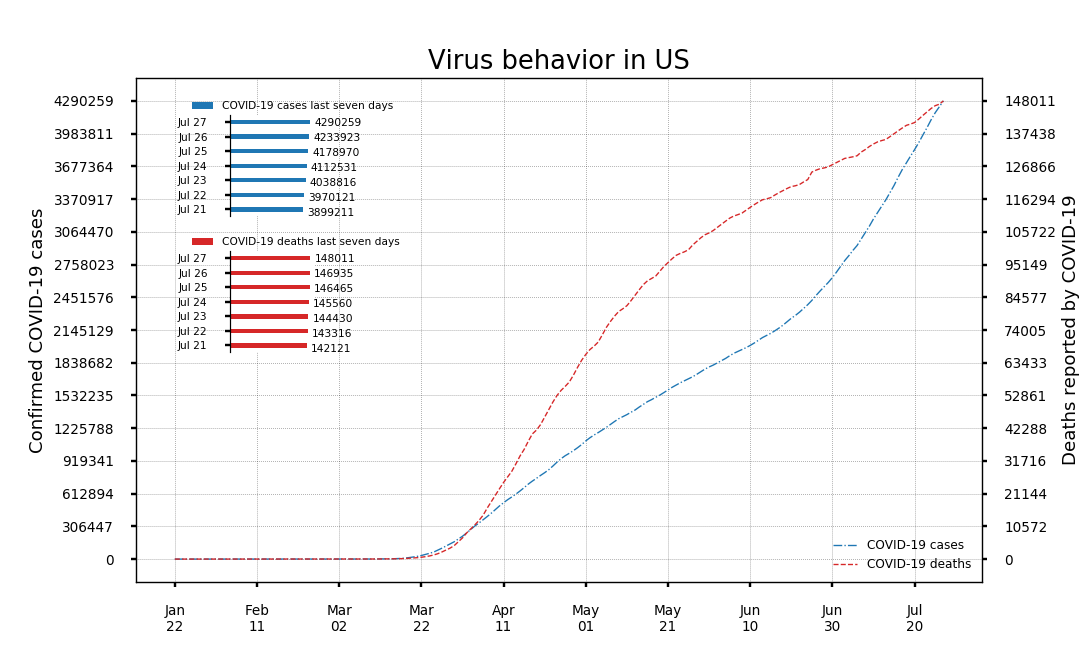

<IPython.core.display.Javascript object>


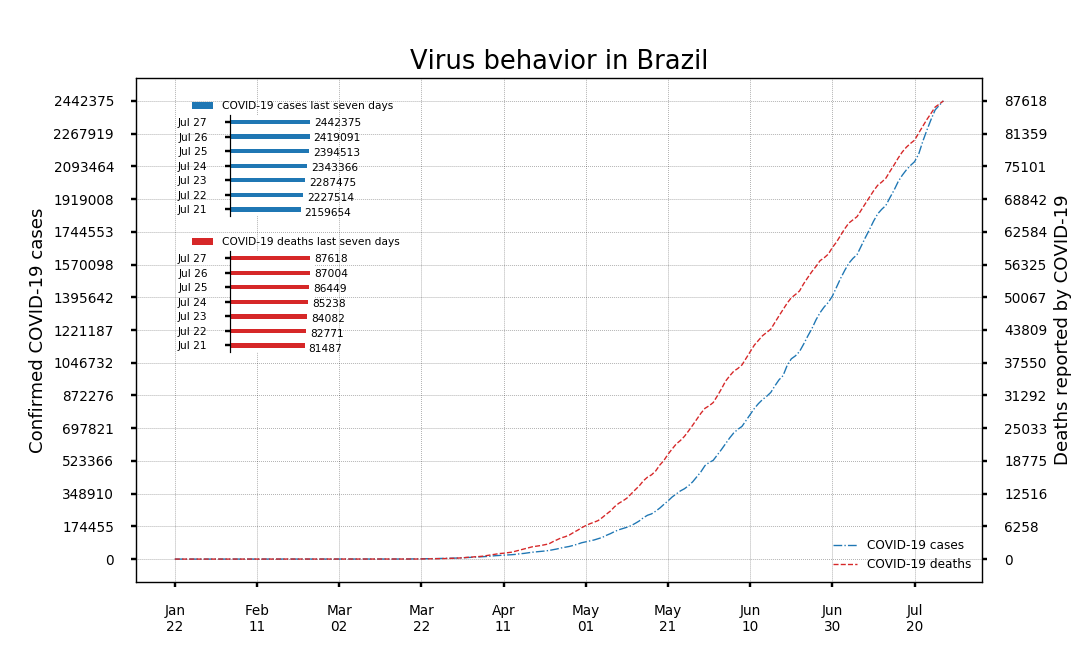

<IPython.core.display.Javascript object>


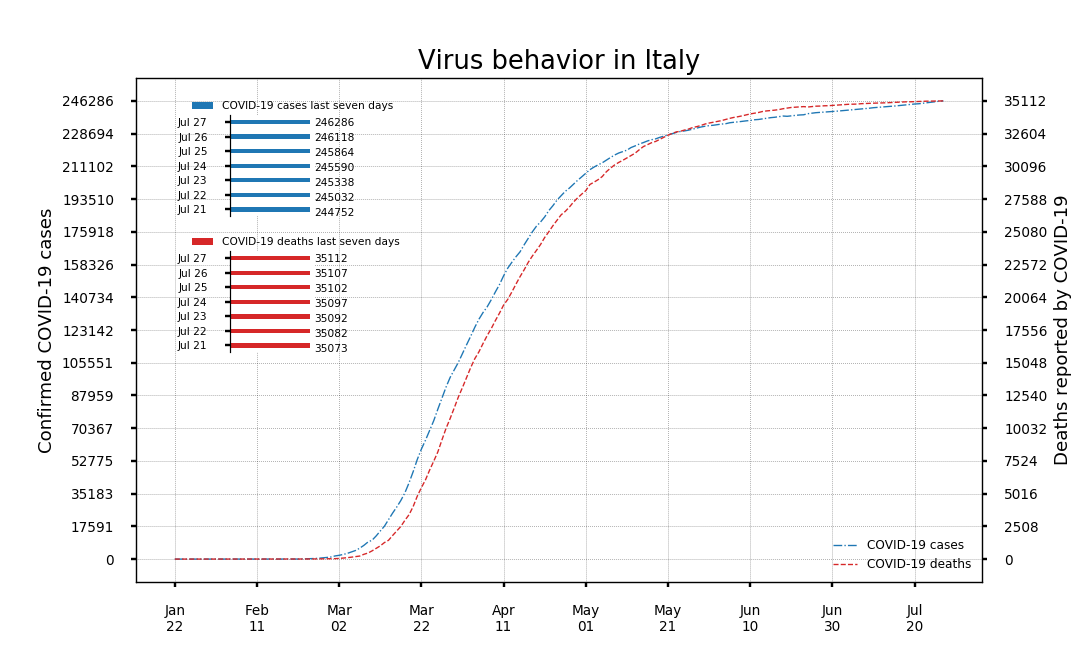

<IPython.core.display.Javascript object>


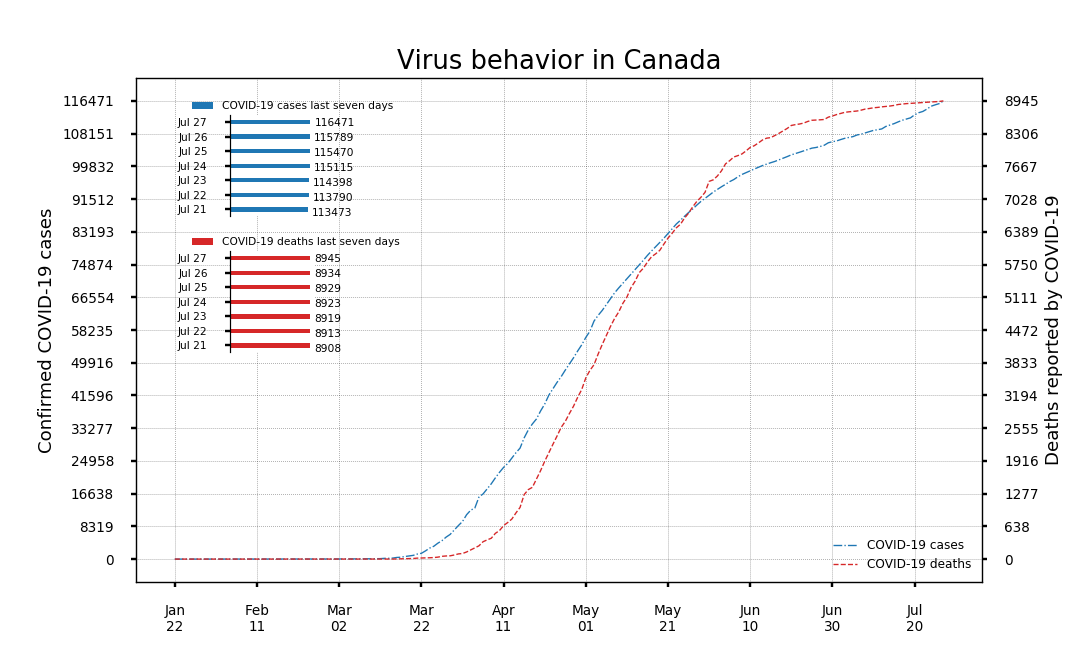

<IPython.core.display.Javascript object>


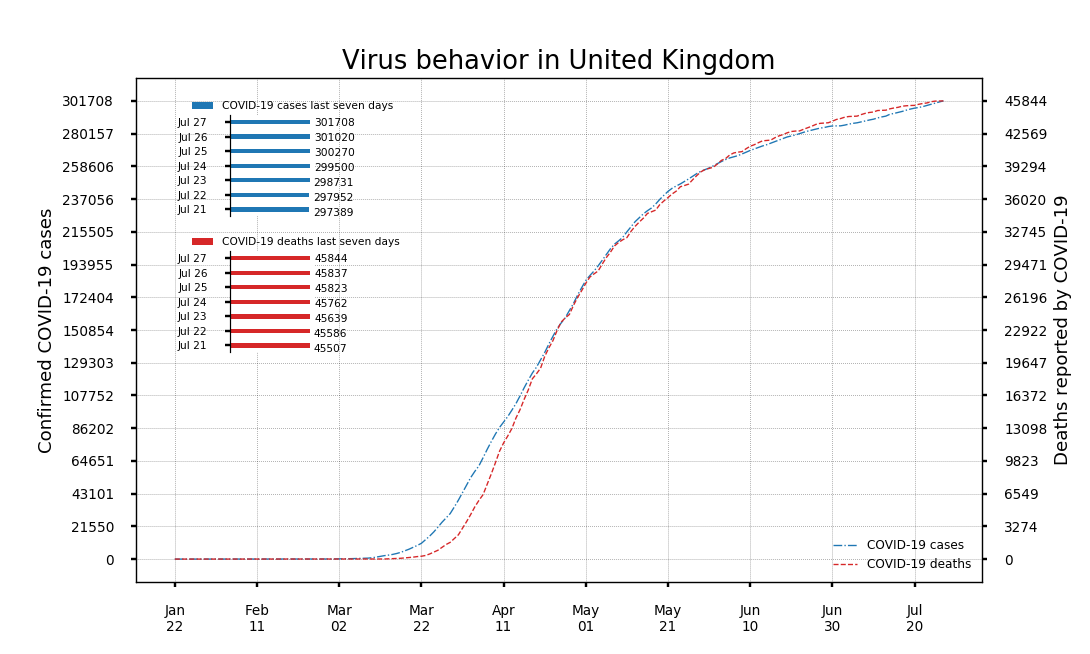

<IPython.core.display.Javascript object>


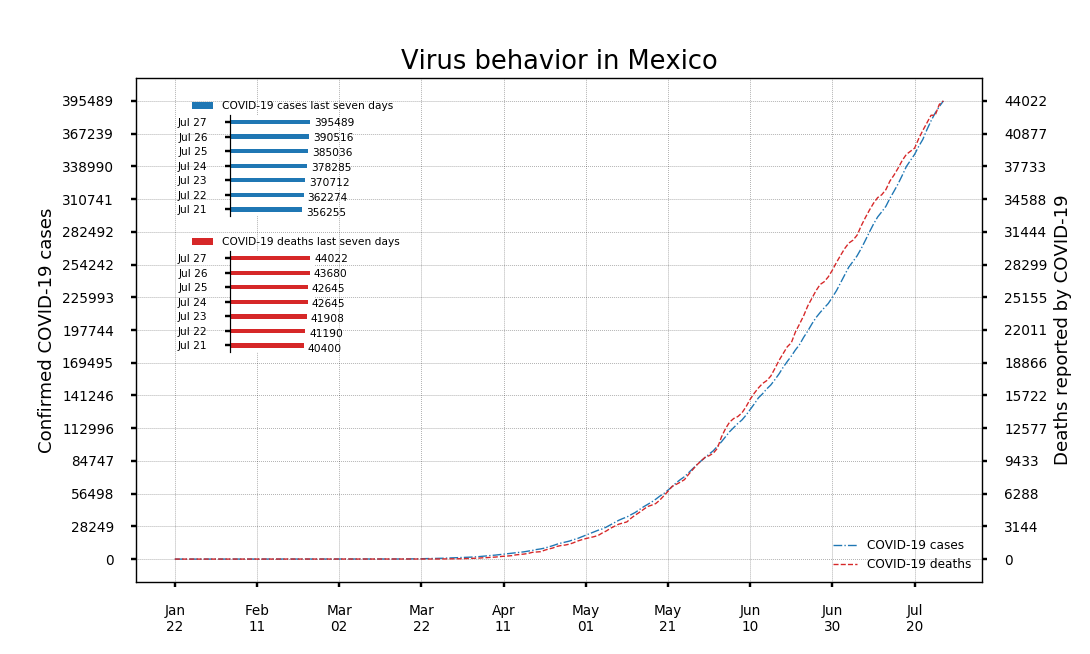

In [12]:
COUNTRIES = "US,Brazil,Italy,Canada,United Kingdom,Mexico".split(",")
for country in COUNTRIES:
    country_plot(data_cases=CASES_DF,
                         data_death=DEATH_DF,
                         country=country,
                         save=False,
                         subplot=True)

In [13]:
def comparison_plots(data_cases, data_death, countries, save=True):
    """
    Function to compare the behavior of the COVID-19 virus in different
    countries. The left plot shows the behavior of confirmed cases, and the
    right plot shows the behavior of sizes by the virus.
    Args:
        data_cases ([Pandas DataFrame]): DataFrame with cases.
        data_death ([Pandas DataFrame]): DataFrame with deaths.
        countries ([list]): List the countries to analize
        save (bool, optional): Flag to save the plot. Defaults to True.
    """

    linestyle = "-. --".split(" ")
    linewidth = 0.9
    step_x = 20
    step_y = 15
    size = 12
    title = "Virus behavior in different countries"
    label_cases = "Confirmed COVID-19 cases"
    label_death = "Deaths reported by COVID-19"
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
    fig.suptitle(f"{title}", size=size + 5)
    fig.subplots_adjust(hspace=0.03,
                        wspace=0.22,
                        left=0.08,
                        right=0.97,
                        bottom=0.08,
                        top=0.93)
    data_cases_max = 0
    data_death_max = 0
    for country in countries:
        data_df = data_country(cases_table=data_cases,
                               death_table=data_death,
                               country=country)
        date_time = np.array(list(map(lambda x: datetime.strptime(x,
                                                                  "%m/%d/%y"),
                                      data_df[:, 0])))
        cases = data_df[:, 1]
        deaths = data_df[:, 2]

        if cases[-1] > data_cases_max:
            data_cases_max = cases[-1]
        if deaths[-1] > data_death_max:
            data_death_max = deaths[-1]

        ax[0].plot(date_time,
                   cases,
                   label=country,
                   ls=linestyle[0],
                   linewidth=linewidth)
        ax[1].plot(date_time,
                   deaths,
                   label=country,
                   linewidth=linewidth,
                   ls=linestyle[1])
        data_ticks = date_time[np.arange(0,
                                         len(date_time),
                                         step_x)]
        for axis in ax:
            axis.set_xticks(data_ticks)
            axis.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))
            axis.xaxis.set_tick_params(rotation=0,
                                       labelsize=size-3)

    for axis, data_max, label in zip(ax,
                                     (data_cases_max, data_death_max),
                                     (label_cases, label_death)):
        axis.grid(True,
                  ls=":",
                  lw=0.5,
                  alpha=0.5,
                  color="black")
        axis.legend(loc=2,
                    fontsize=size-4,
                    frameon=False)
        values_tick = np.linspace(0,
                                  data_max,
                                  step_y,
                                  dtype=int)
        axis.set_yticks(values_tick)
        axis.yaxis.set_tick_params(labelsize=size-3)
        axis.set_ylabel(label,
                        size=size)
    if save:
        plt.savefig(f"Comparison/{' '.join(countries)}.png",
                    dpi=300)

<IPython.core.display.Javascript object>


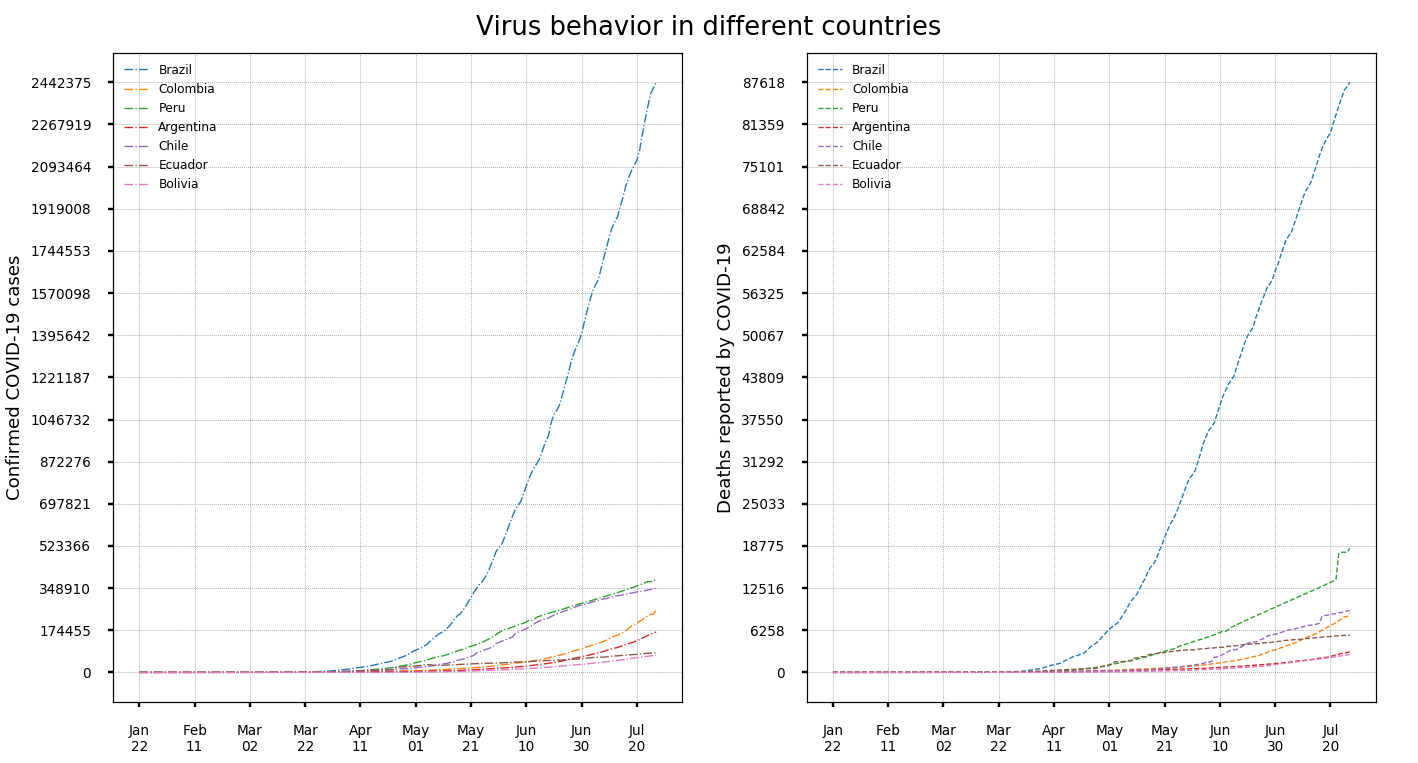

<IPython.core.display.Javascript object>


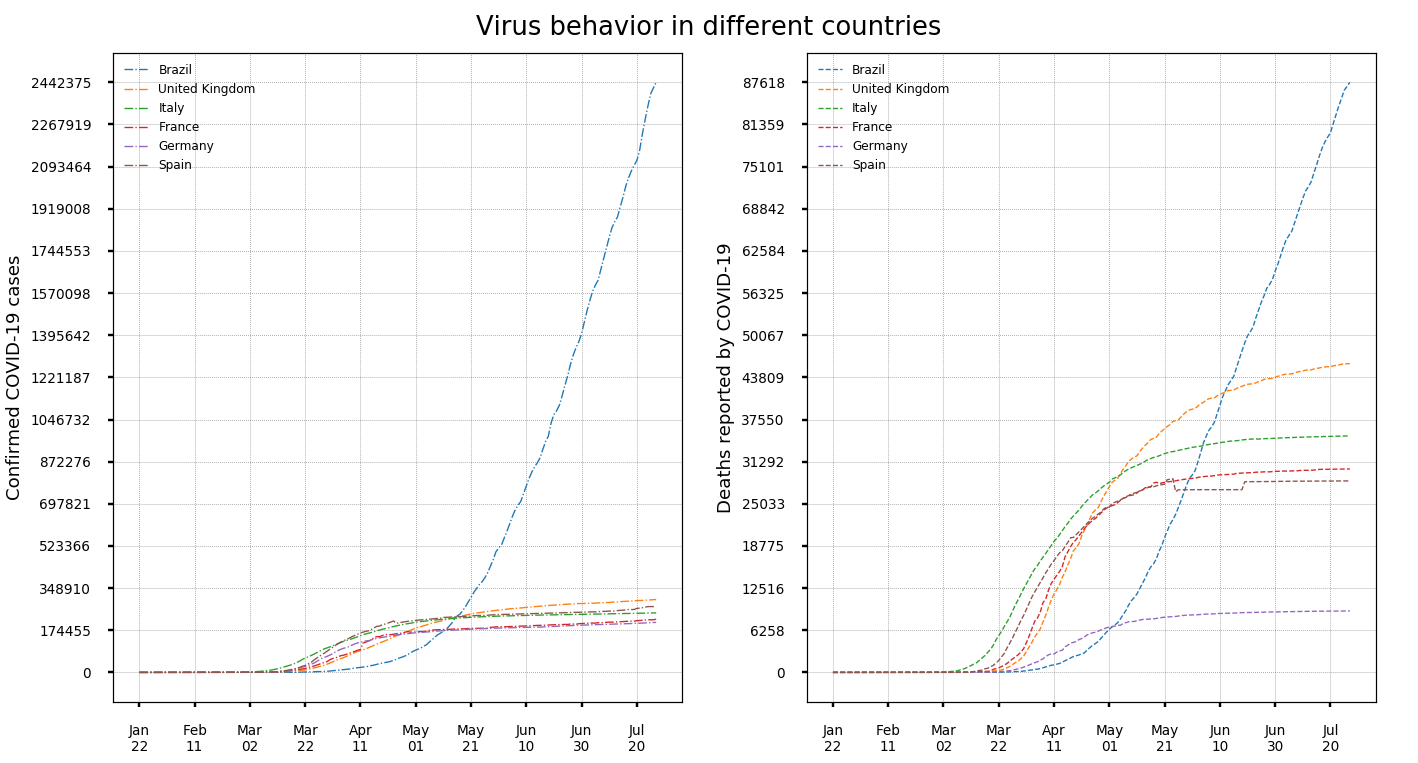

<IPython.core.display.Javascript object>


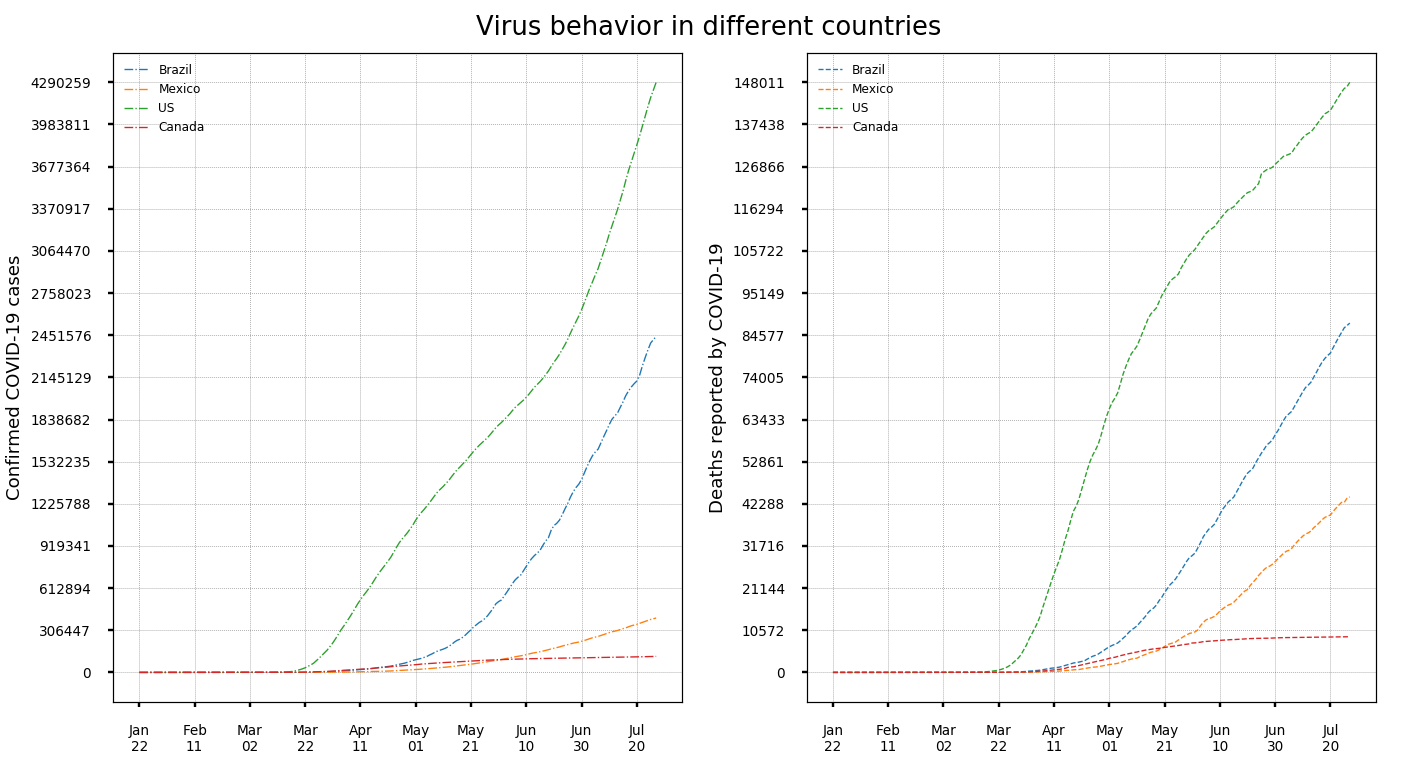

In [14]:
COUNTRIES_COMPARISON1 = "Brazil,Colombia,Peru,Argentina,Chile,Ecuador,Bolivia".split(",")
COUNTRIES_COMPARISON2 = "Brazil,United Kingdom,Italy,France,Germany,Spain".split(",")
COUNTRIES_COMPARISON3 = "Brazil,Mexico,US,Canada".split(",")
COUNTRIES = (COUNTRIES_COMPARISON1, COUNTRIES_COMPARISON2, COUNTRIES_COMPARISON3)
for countries in COUNTRIES:
    comparison_plots(data_cases=CASES_DF,
                     data_death=DEATH_DF,
                     countries=countries,
                     save=False)

In [15]:
def new_cases_per_day(data_cases, data_death, country, windows_size=7, alpha1=0.1, save=True):
    """
    Function to graph the new confirmed cases of the COVID-19 virus and the new
    deaths caused by the virus. The graph also shows the simple and exponential
    moving averages (SMA and EMA).

    Args:
        data_cases (Pandas DataFrame): DataFrame with cases.
        data_death (Pandas DataFrame): DataFrame with deaths.
        country (string): Country to analize.
        windows_size (int, optional): Number of elements to compute the
        average. Defaults to 7.
        alpha1 (float, optional): Factor alpha. Defaults to 0.1.
        save (bool, optional): Flag to save the plot. Defaults to True.
    """

    labels = "New confirmed cases of COVID per day,New confirmed deaths from\
COVID per day".split(",")
    colors = "tab:blue tab:red".split(" ")
    linewidth = 0.9
    step_x = 20
    step_y = 15
    size = 12
    title_case = "New cases reported per day in"
    title_deaths = "New deaths reported per day in"

    data_df = data_per_day(data_cases=data_cases,
                           data_death=data_death,
                           country=country)
    cases = data_df[0]
    deaths = data_df[0]
    date_time_cases = np.array(list(map(lambda x:
                                        datetime.strptime(x, "%m/%d/%y"),
                                        cases[:, 0])))
    date_time_deaths = np.array(list(map(lambda x:
                                         datetime.strptime(x, "%m/%d/%y"),
                                         deaths[:, 0])))
    new_values = (cases[:, 1], deaths[:, 1])
    data_times = (date_time_cases, date_time_deaths)
    # SMA
    new_values_sma = tuple(map(lambda i: pd.Series(new_values[i]).rolling(
        windows_size).mean().dropna().values,
        range(len(new_values))))
    # EMA
    new_values_ema = tuple(map(lambda i:
                               pd.DataFrame(new_values[i]).ewm(alpha=alpha1,
                                                               adjust=False).mean().values,
                               range(len(new_values))))

    data_ticks = (date_time_cases[np.arange(0, len(date_time_cases),
                                            step_x)],
                  date_time_deaths[np.arange(0, len(date_time_deaths),
                                             step_x)])
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
    fig.subplots_adjust(hspace=0.03,
                        wspace=0.22,
                        left=0.08,
                        right=0.97,
                        bottom=0.08,
                        top=0.93)
    zip_values = zip(ax,
                     new_values,
                     new_values_sma,
                     new_values_ema,
                     data_times,
                     data_ticks,
                     (title_case, title_deaths),
                     colors,
                     labels)
    for axis, new_values, average_mov, average_exp_mov1, date_time, data_tick,\
            title, color, label in zip_values:
        axis.set_title(f"{title} {country}", size=size + 2)
        axis.bar(date_time,
                 new_values,
                 width=1,
                 alpha=0.2,
                 color=color,
                 label="New cases")
        axis.plot(date_time[windows_size-1:],
                  average_mov,
                  ls="--",
                  linewidth=linewidth,
                  color=color,
                  label=f"SMA windows = {windows_size}")
        axis.plot(date_time,
                  average_exp_mov1,
                  ls=":",
                  linewidth=linewidth,
                  color="darkblue",
                  label=fr"EMA $\alpha$ = {alpha1}")
        axis.set_xticks(data_tick)
        axis.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))
        axis.xaxis.set_tick_params(rotation=0,
                                   labelsize=size-3)
        values_tick = np.linspace(0,
                                  np.max(new_values),
                                  step_y,
                                  dtype=int)
        axis.set_yticks(values_tick)
        axis.yaxis.set_tick_params(labelsize=size-3)
        axis.set_ylabel(label,
                        size=size)
        axis.grid(True,
                  ls=":",
                  lw=0.5,
                  alpha=0.5,
                  color="black")
        axis.legend(loc=2,
                    fontsize=size-4,
                    frameon=False)
        if save:
            plt.savefig(f"New_cases_per_day/{country}.png",
                        dpi=300)

<IPython.core.display.Javascript object>


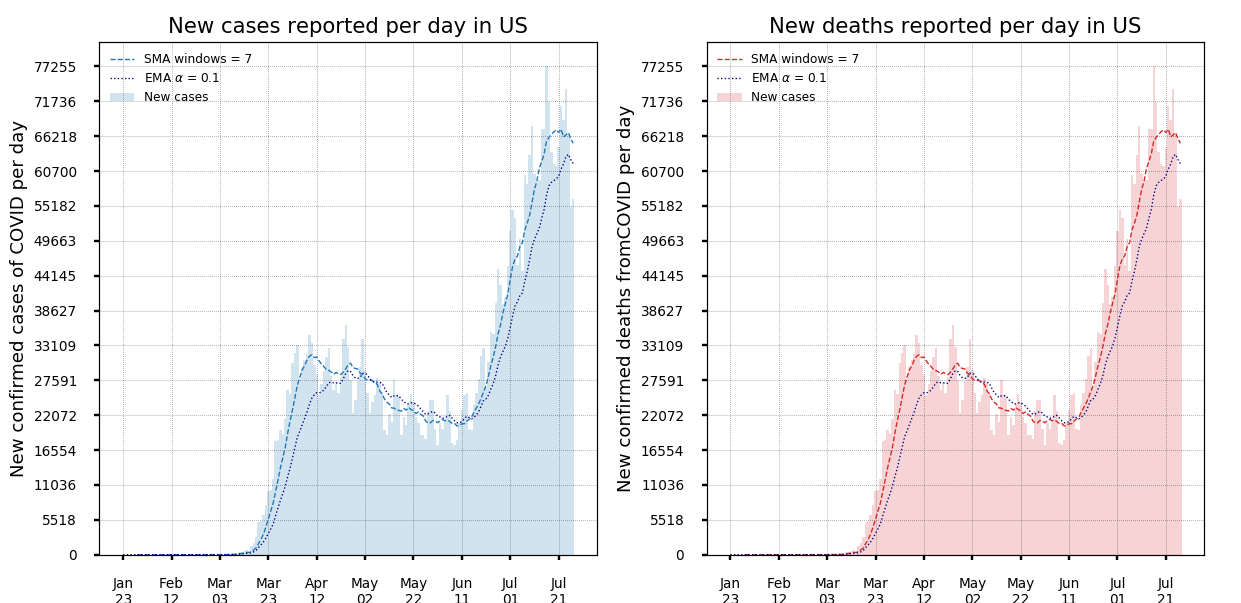

<IPython.core.display.Javascript object>


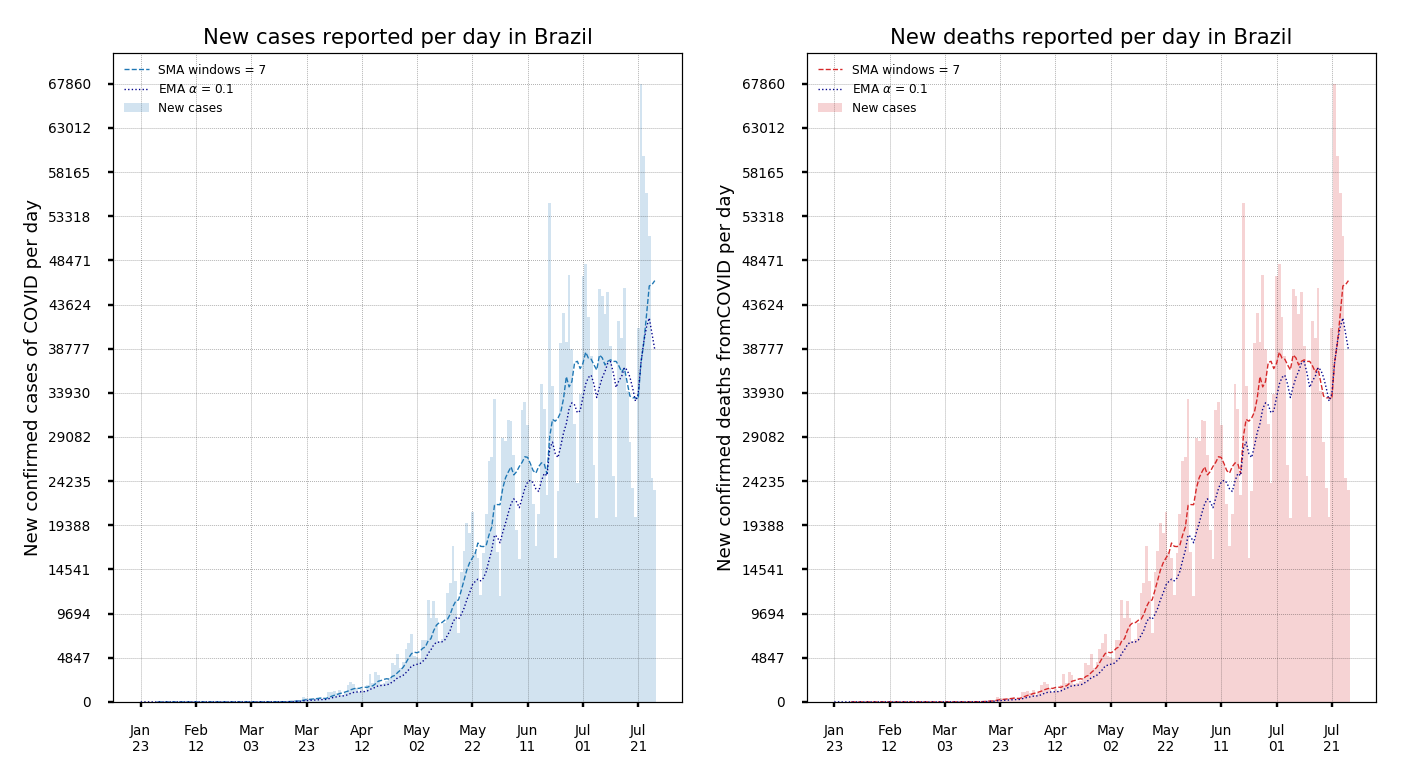

<IPython.core.display.Javascript object>


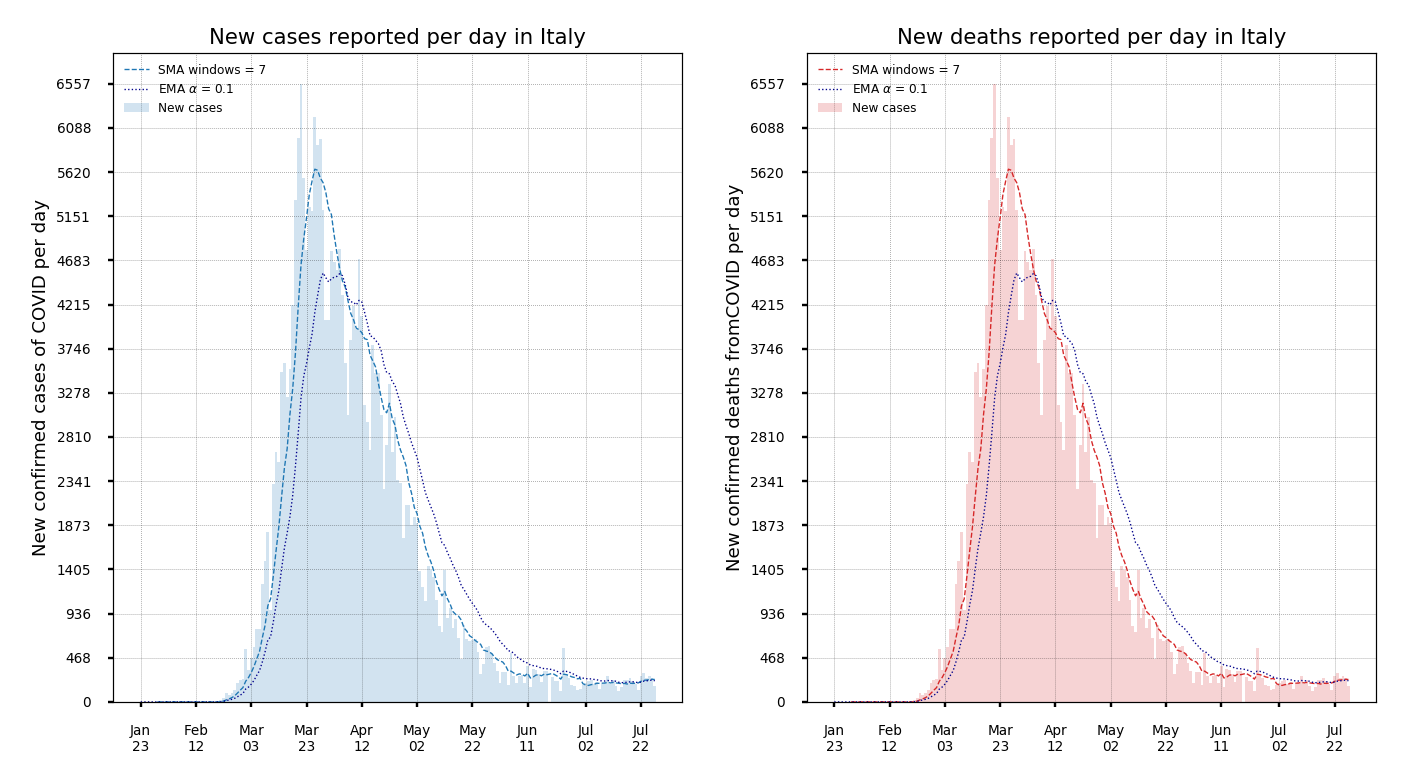

<IPython.core.display.Javascript object>


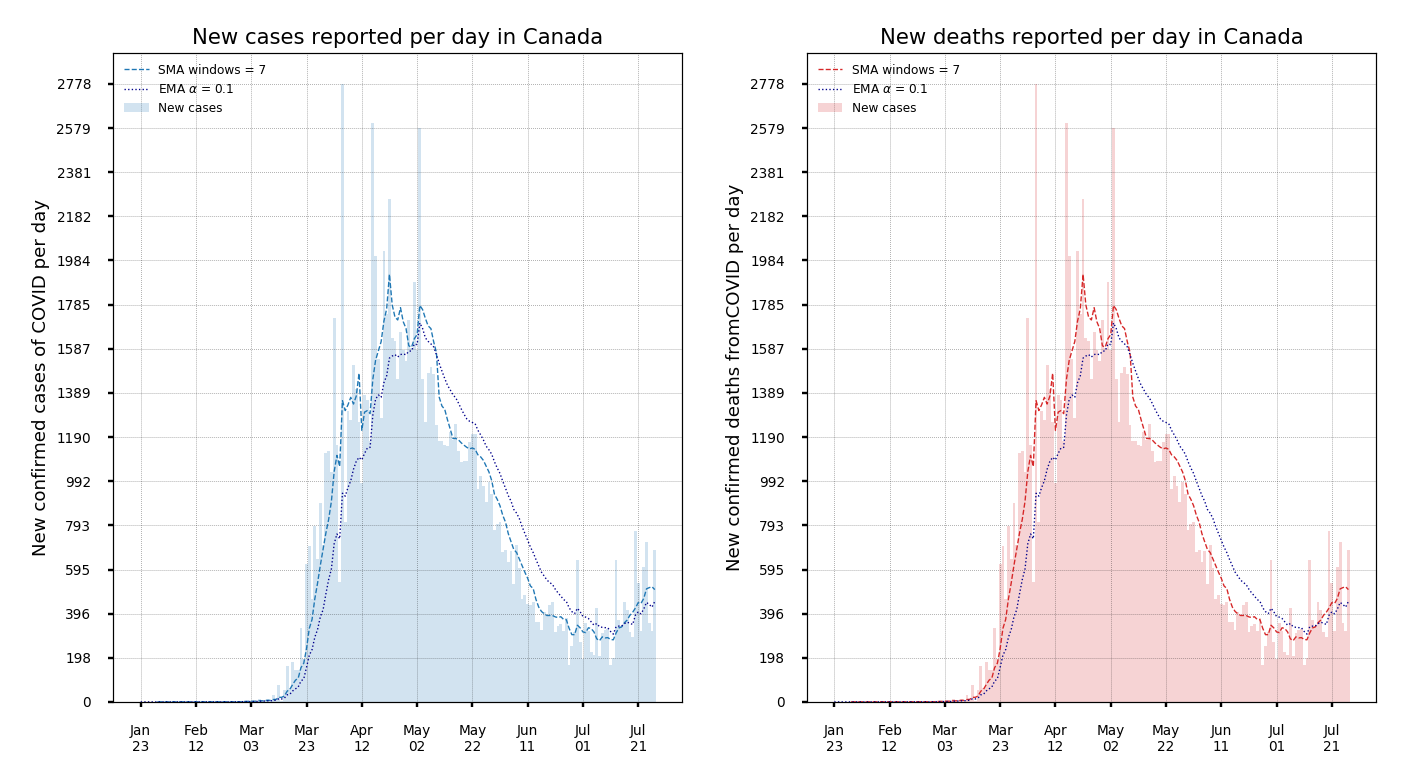

<IPython.core.display.Javascript object>


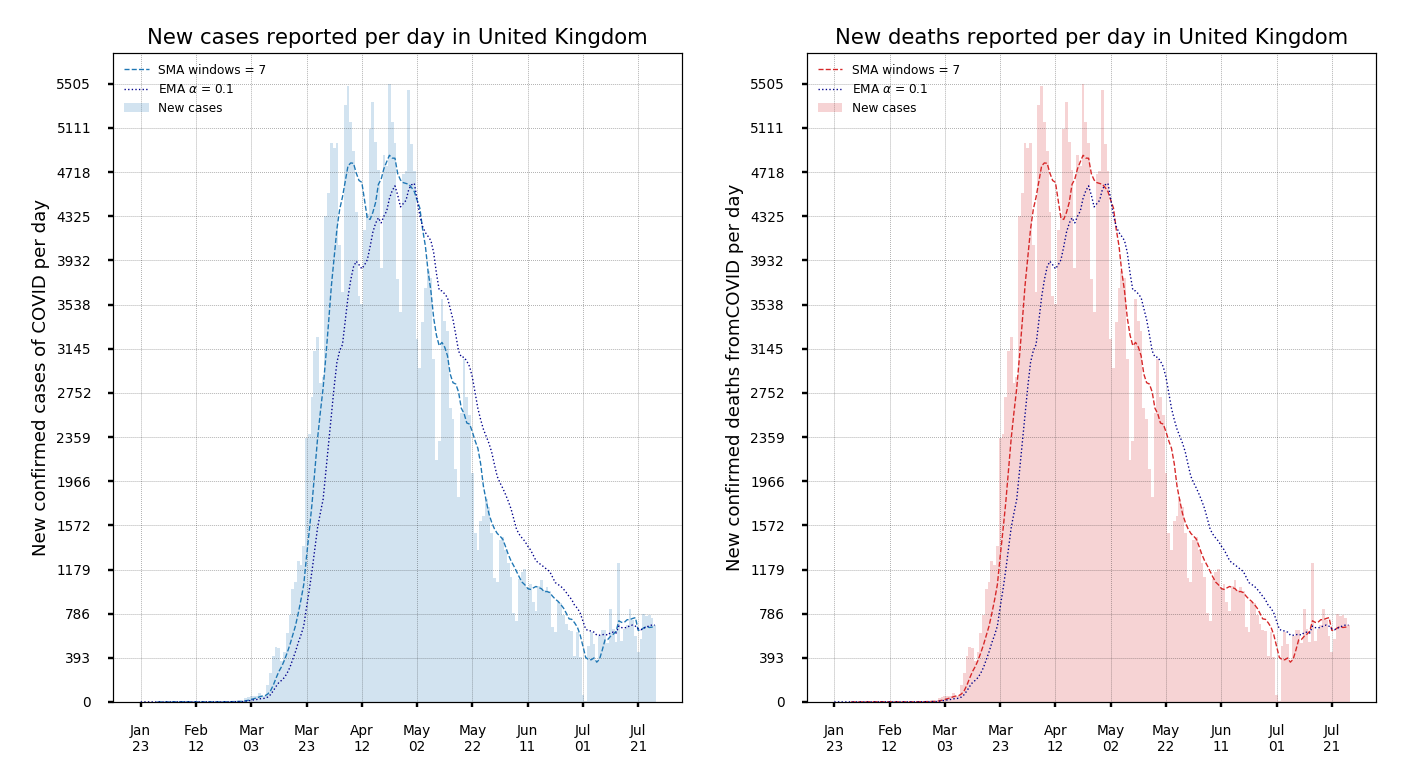

<IPython.core.display.Javascript object>


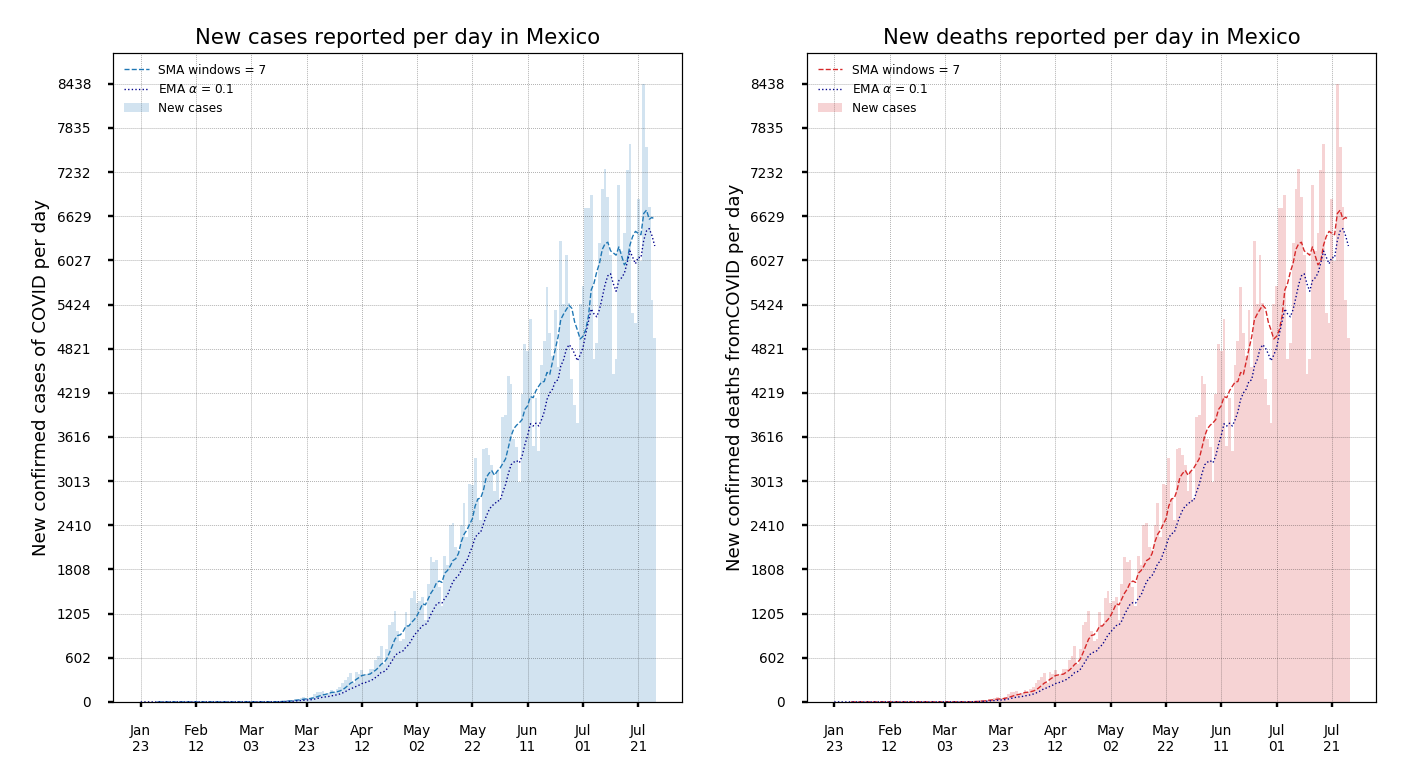

In [16]:
COUNTRIES = "US,Brazil,Italy,Canada,United Kingdom,Mexico".split(",")
for country in COUNTRIES:
    new_cases_per_day(data_cases=CASES_DF,
                      data_death=DEATH_DF,
                      country=country,
                      save=False,
                      windows_size=7,
                      alpha1=0.1)

In [17]:
def new_cases_per_day_fill_plot(data_cases, data_death, country,
                                windows_size=7, save=True):
    """
    Function to graph the moving average and standard deviation for newly
    registered cases of COVID-19 and new deaths registered per day.

    Args:
        data_cases (Pandas DataFrame): [description]
        data_death (Pandas DataFrame): [description]
        country (string): [description]
        windows_size (int, optional): Number of elements to compute the average
        and standard deviation. Defaults to 7.
        save (bool, optional): Flag to save the plot. Defaults to True.
    """

    labels = "New confirmed cases of COVID per day,New confirmed deaths from\
COVID per day".split(",")
    colors = "tab:blue tab:red".split(" ")
    linewidth = 0.9
    step_x = 20
    step_y = 15
    size = 12
    title_case = "SMA and STD to new cases reported per day in"
    title_deaths = "SMA and STD to New deaths reported per day in"

    data_df = data_per_day(data_cases=data_cases,
                           data_death=data_death,
                           country=country)
    cases = data_df[0]
    deaths = data_df[0]
    date_time_cases = np.array(list(map(lambda x:
                                        datetime.strptime(x, "%m/%d/%y"),
                                        cases[:, 0])))
    date_time_deaths = np.array(list(map(lambda x:
                                         datetime.strptime(x, "%m/%d/%y"),
                                         deaths[:, 0])))
    new_values = (cases[:, 1], deaths[:, 1])
    data_times = (date_time_cases, date_time_deaths)
    # SMA
    new_values_sma = tuple(map(lambda i: pd.Series(new_values[i]).rolling(
        windows_size).mean().dropna().values,
        range(len(new_values))))
    new_values_std = tuple(map(lambda i: pd.Series(new_values[i]).rolling(
        windows_size).std().dropna().values,
        range(len(new_values))))

    data_ticks = (date_time_cases[np.arange(0, len(date_time_cases),
                                            step_x)],
                  date_time_deaths[np.arange(0, len(date_time_deaths),
                                             step_x)])
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
    fig.subplots_adjust(hspace=0.03,
                        wspace=0.22,
                        left=0.08,
                        right=0.97,
                        bottom=0.08,
                        top=0.93)
    zip_values = zip(ax,
                     new_values,
                     new_values_sma,
                     new_values_std,
                     data_times,
                     data_ticks,
                     (title_case, title_deaths),
                     colors,
                     labels)
    for axis, new_value, average_mov, average_std, date_time, data_tick,\
            title, color, label in zip_values:
        axis.set_title(f"{title} {country}", size=size + 2)
        axis.plot(date_time[windows_size-1:],
                  average_mov,
                  ls="-",
                  linewidth=linewidth,
                  color=color,
                  label=f"SMA windows = {windows_size}")
        axis.fill_between(x=date_time[windows_size-1:],
                          y1=average_mov + average_std,
                          y2=average_mov - average_std,
                          where=average_mov - average_std > 0,
                          facecolor=color,
                          alpha=0.5)
        axis.set_xticks(data_tick)
        axis.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))
        axis.xaxis.set_tick_params(rotation=0,
                                   labelsize=size-3)
        values_tick = np.linspace(0,
                                  np.max(new_value),
                                  step_y,
                                  dtype=int)
        axis.set_yticks(values_tick)
        axis.yaxis.set_tick_params(labelsize=size-3)
        axis.set_ylabel(label,
                        size=size)
        axis.grid(True,
                  ls=":",
                  lw=0.5,
                  alpha=0.5,
                  color="black")
        axis.legend(loc=2,
                    fontsize=size-4,
                    frameon=False)
    if save:
        plt.savefig(f"New_cases_fill_plot/{country}.png",
                    dpi=300)


<IPython.core.display.Javascript object>


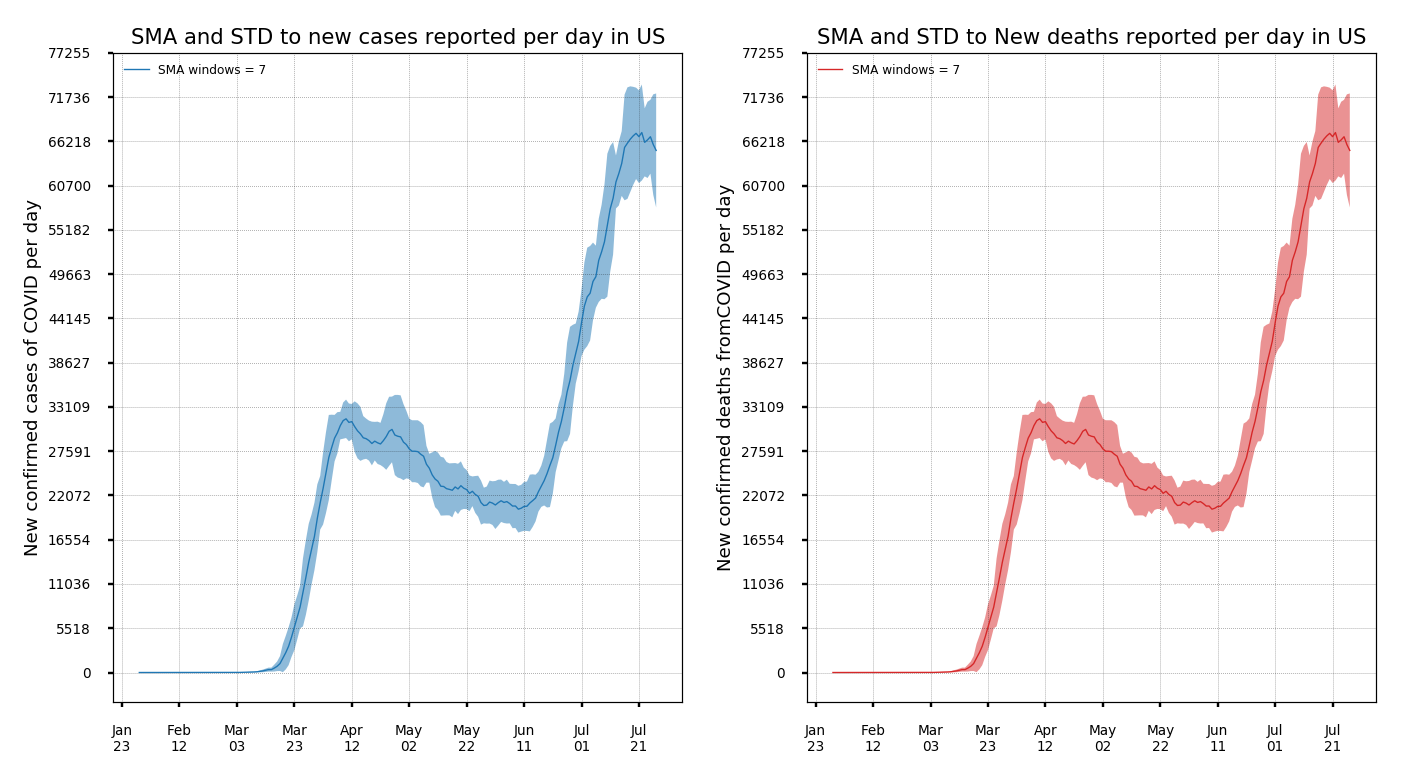

<IPython.core.display.Javascript object>


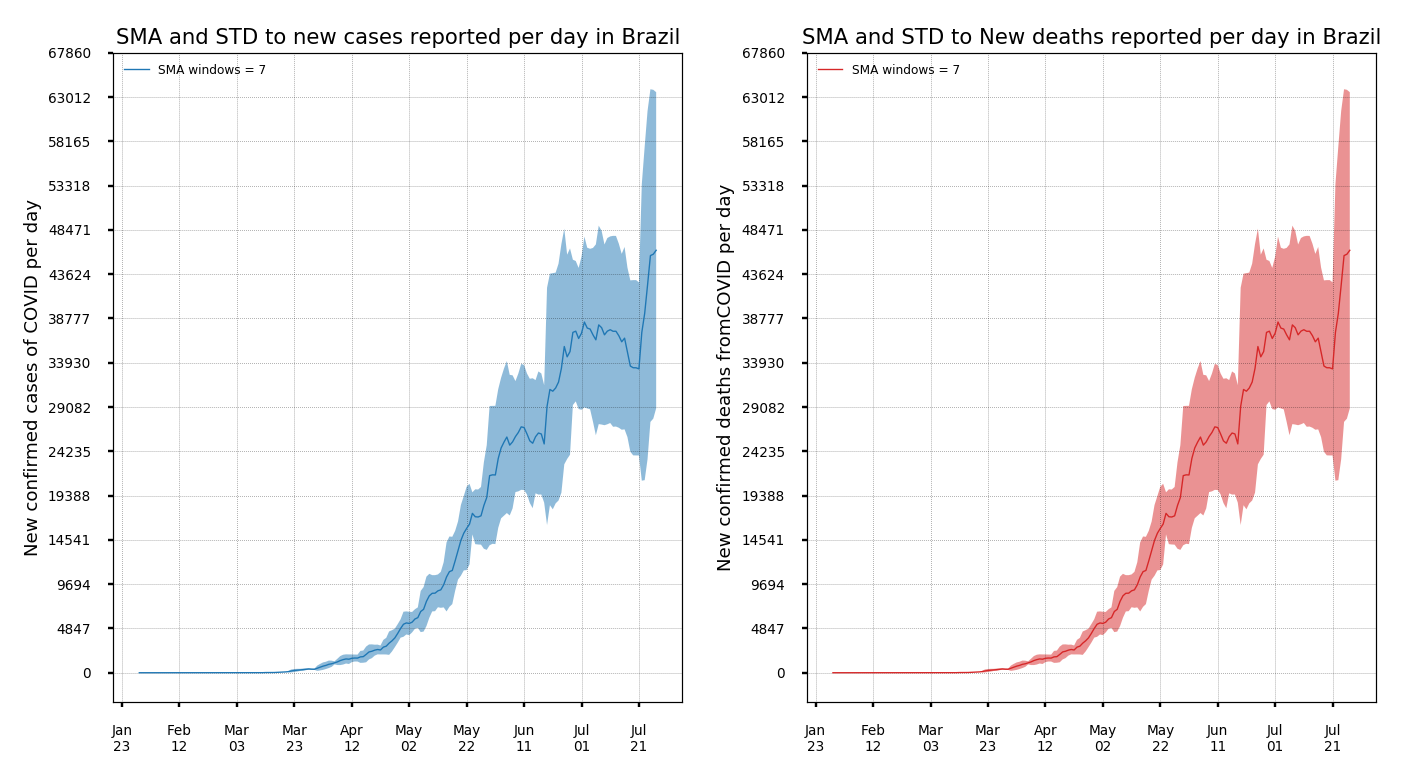

<IPython.core.display.Javascript object>


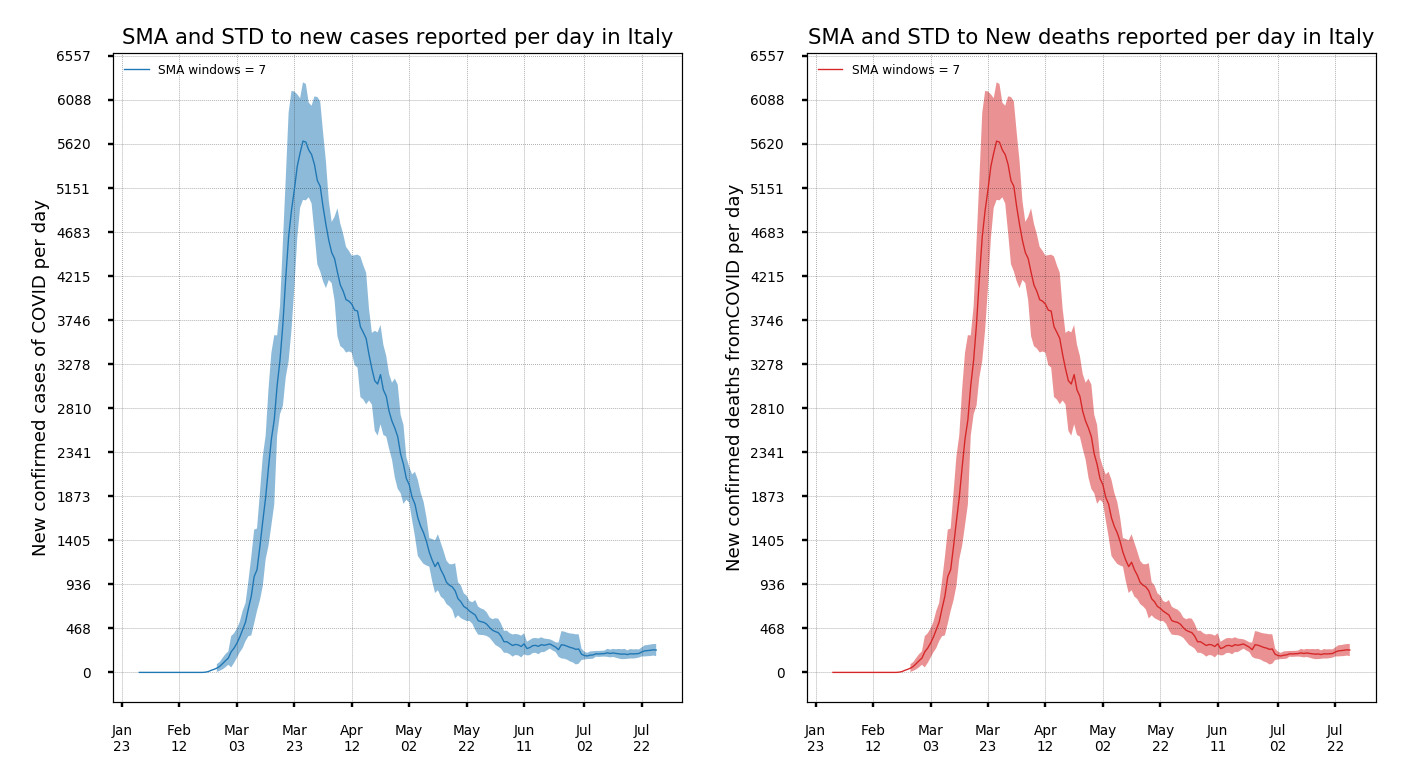

<IPython.core.display.Javascript object>


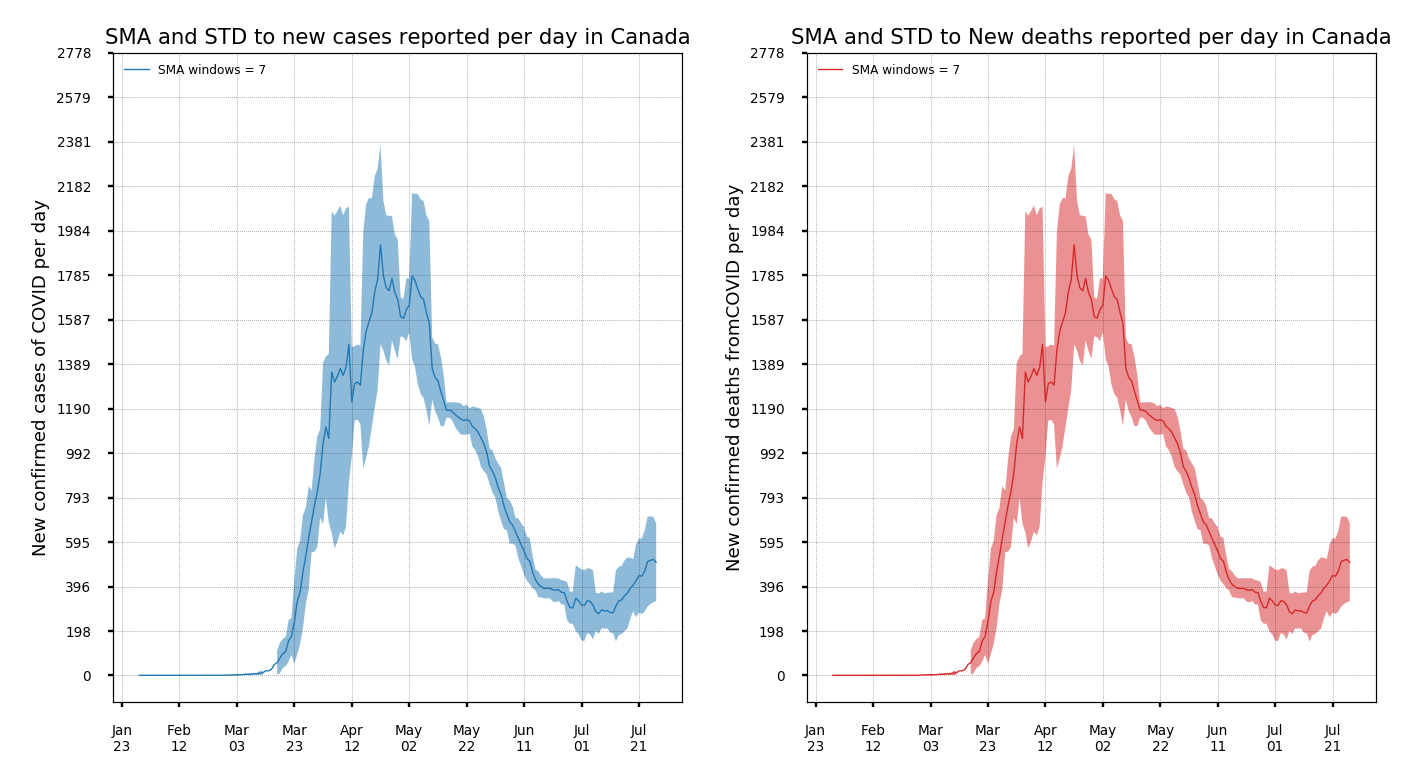

<IPython.core.display.Javascript object>


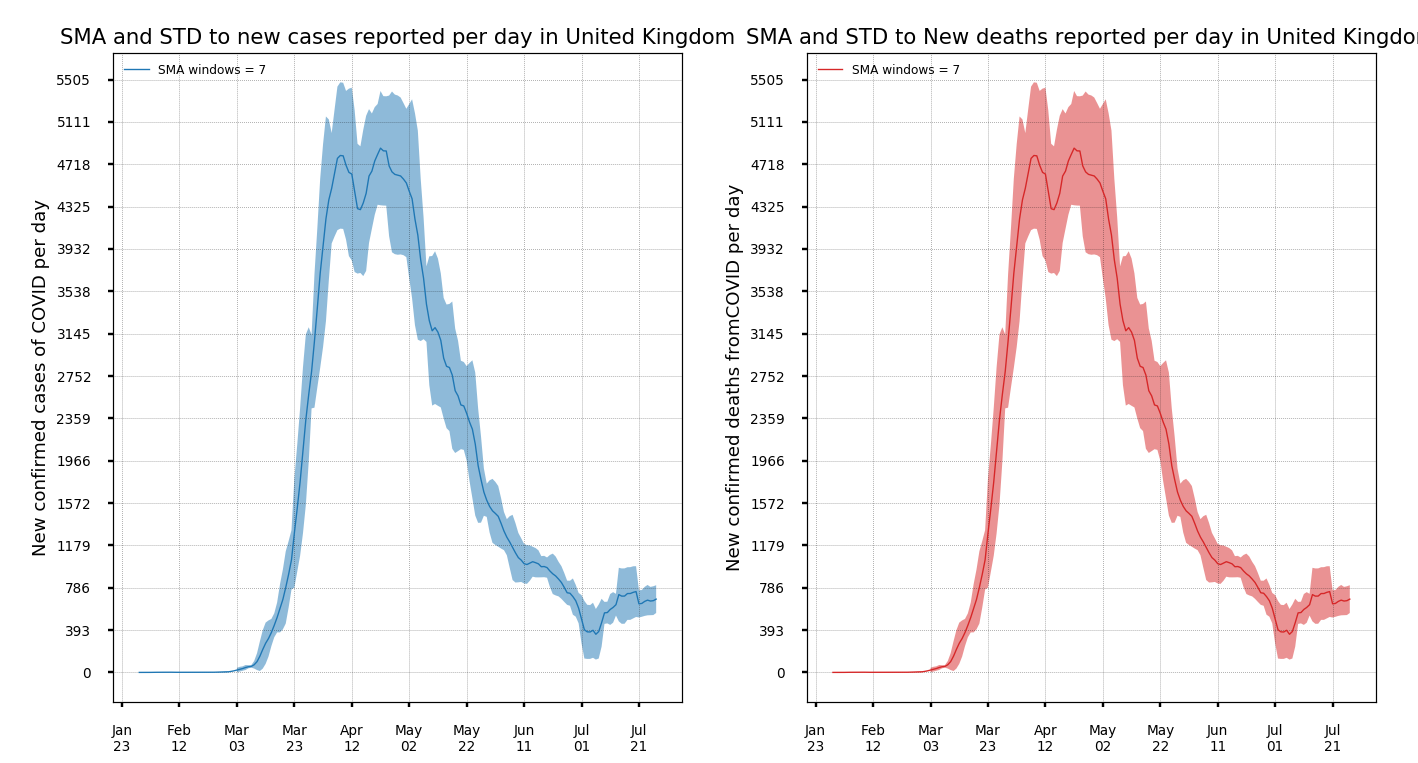

/home/fernan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


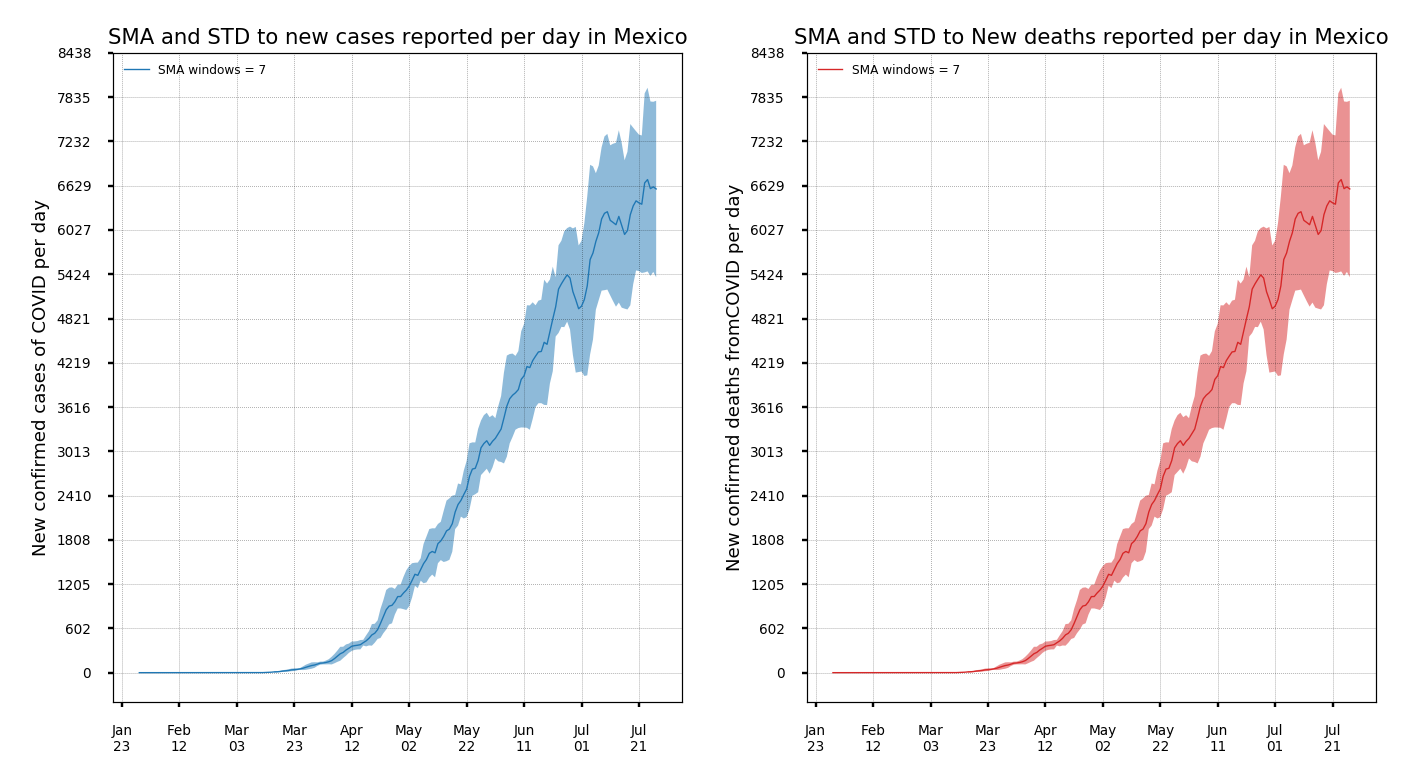

In [19]:
COUNTRIES = "US,Brazil,Italy,Canada,United Kingdom,Mexico".split(",")
for country in COUNTRIES:
    new_cases_per_day_fill_plot(data_cases=CASES_DF,
                                    data_death=DEATH_DF,
                                    country=country,
                                    windows_size=7,
                                    save=False)